## Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

In [56]:
data = np.load("D:/git/jetracer/set_6/raw/set6_clock5.npz", allow_pickle=True)
train = data["train"]
train.shape

(7829, 3)

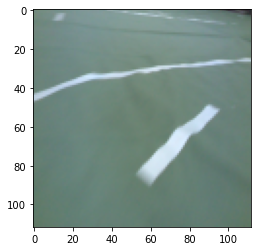

In [65]:
sample_1 = train[7000][0]
# print(train[300][1])
# sample_2 = train[][0]
# sample_1=sample_1-sample_2
plt.imshow(sample_1,cmap='gray')

In [66]:
train= train[50:7000]
train.shape
np.savez("D:/git/jetracer/set_6/preprocessed/preprocessed_clock5.npz", train)

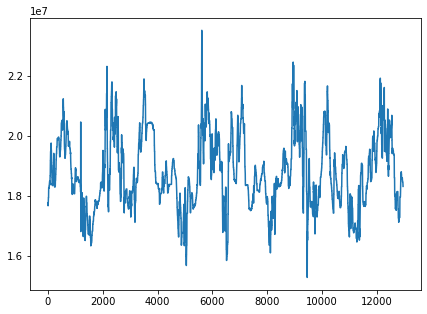

In [53]:
data = []
index = [val for val in range(len(train))]
for val in train:
    sum_d = np.sum(val[0])
    data.append(sum_d)
    
plt.figure(figsize=(7,5)) 
plt.plot(index, data)

## NPZ >> Balance >> RGB-to-Grey >> Tensor

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from skimage import color
import random
import os
import numpy as np
import cv2
dataset="set_6"
directory="D:/git/jetracer/"+dataset

#### Combine sets

In [4]:
def get_all_file_paths(directory): 
    file_paths = [] 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
    return file_paths  

In [5]:
def concat_npz(directory,typ):
    file_paths = get_all_file_paths(directory)
    start=True
    for filename in file_paths:
        if start:
            data=np.load(filename,allow_pickle=True)
            all_data=data[typ]
            start=False 
        else:
            data=np.load(filename,allow_pickle=True)
            dt=data[typ]
            all_data=np.concatenate((all_data,dt), axis = 0)
    return all_data

all_data=concat_npz(directory+"/preprocessed","arr_0")
print(len(all_data))

369774


In [ ]:
np.random.shuffle(all_data)
np.savez(directory+"/preprocessed/preprocessed_not_balanced.npz", all_data)

#### Balance lables

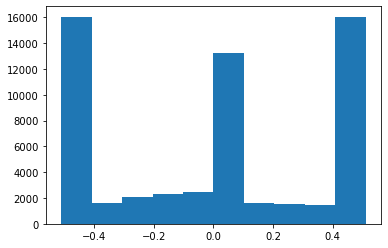

In [2]:
## Pre-balancing
all_data=np.load(directory+"/preprocessed/preprocessed_all_data.npz",allow_pickle=True)
all_data=all_data["arr_0"]
lis=[]
for val in range(len(all_data)):
    lis.append(all_data[val][2])
abc=plt.hist(lis,bins=10)

In [6]:
all_data[0][0].shape

(224, 224, 3)

In [7]:
bin_1=[]
bin_2=[]
bin_3=[]
bin_4=[]
for val in range(len(all_data)):
    if all_data[val][2]<-0.4:
        bin_1.append(all_data[val])
    elif all_data[val][2]>0.4:
        bin_2.append(all_data[val])
    elif all_data[val][2]>-0.15 and all_data[val][2]<0.15:
        bin_3.append(all_data[val])   
    else:
        bin_4.append(all_data[val])
        
print(len(bin_1))
print(len(bin_2))
print(len(bin_3))
print(len(bin_4))

39671
38045
27637
18447


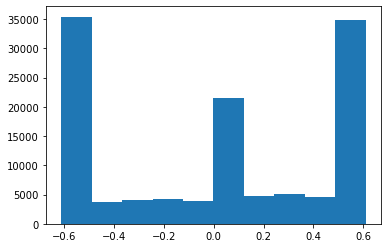

In [8]:
## Post balancing
random.shuffle(bin_1)
bin_1=bin_1[0:38045]
all_data=np.concatenate((bin_1,bin_2,bin_3,bin_4), axis = 0)
lis=[]
for val in range(len(all_data)):
    lis.append(all_data[val][2])
abc=plt.hist(lis,bins=10)

In [9]:
np.savez(directory+"/preprocessed/preprocessed_all_data.npz", all_data)

#### NPZ to tensor

In [5]:
all_data=np.load(directory+"/preprocessed/preprocessed_all_data.npz",allow_pickle=True)
all_data=all_data["arr_0"]
np.random.shuffle(all_data)

In [6]:
train=all_data[0:int(all_data.shape[0]*0.80)]
test=all_data[int(all_data.shape[0]*0.80):all_data.shape[0]]

In [7]:
train_data=[]
for val_1 in train:
    gray=torch.tensor(cv2.resize(color.rgb2gray(val_1[0]),dsize = (112,112), interpolation = cv2.INTER_CUBIC)).unsqueeze(1)
#     gray=torch.tensor(color.rgb2gray(val_1[0])).unsqueeze(1)
    tup=(gray,torch.tensor(val_1[1]),torch.tensor(val_1[2]))
    train_data.append(tup)
torch.save(train_data, directory+"/pt_acc/"+dataset+"_train_rsz_withacc.pt")

In [8]:
test_data=[]
for val_1 in test:
    gray=torch.tensor(cv2.resize(color.rgb2gray(val_1[0]),dsize = (112,112), interpolation = cv2.INTER_CUBIC)).unsqueeze(1)
#     gray=torch.tensor(color.rgb2gray(val_1[0])).unsqueeze(1)
    tup=(gray,torch.tensor(val_1[1]),torch.tensor(val_1[2]))
    test_data.append(tup)
torch.save(test_data, directory+"/pt_acc/"+dataset+"_test_rsz_withacc.pt")